In [2]:
from scipy.special import erf
import numpy as np

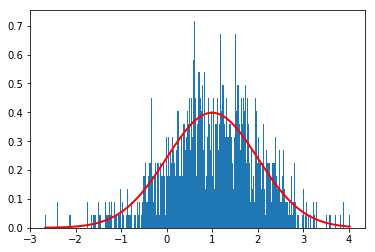

In [26]:
err = 0.001
mu, sigma = 1 - err, 1 + err # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

abs(mu - np.mean(s)) < 0.01

abs(sigma - np.std(s, ddof=1)) < 0.01

import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s, 300, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

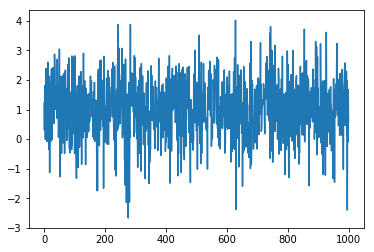

In [27]:
plt.plot(s)

In [20]:
print(s)

[ 1.64589052  1.24552937  1.69261546 ... -0.35007683 -0.85198269
  1.41217555]


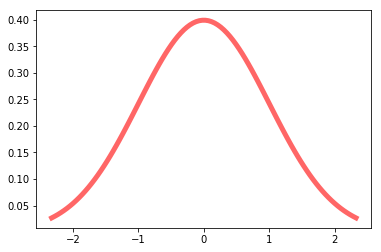

In [40]:
>>> from scipy.stats import norm
>>> import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01),
...                 norm.ppf(0.99), 100)
>>> ax.plot(x, norm.pdf(x),
...        'r-', lw=5, alpha=0.6, label='norm pdf')

In [118]:
x = np.random.normal(loc=1, scale=0.03, size=500)

(array([  1.,   6.,  17.,  51., 107.,  96., 115.,  71.,  27.,   9.]),
 array([0.89487919, 0.91336651, 0.93185384, 0.95034116, 0.96882849,
        0.98731581, 1.00580314, 1.02429047, 1.04277779, 1.06126512,
        1.07975244]),
 <a list of 10 Patch objects>)

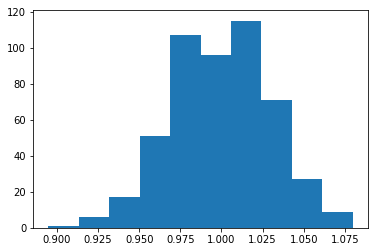

In [119]:
plt.hist(x)

In [120]:
print(x)

[1.02328811 1.02970172 1.04375462 1.0257386  1.04279981 1.01368718
 0.99916781 1.00344561 1.01105615 0.98331718 1.03166756 1.01346731
 0.96381491 1.06775749 0.97854695 1.01019352 1.01971672 0.97275339
 1.00128167 1.02066019 0.99659668 0.9732187  1.03657456 1.00680046
 0.98951221 0.93060457 0.97855063 0.96443785 1.01344949 1.02182832
 0.98371254 1.02700518 0.97733103 0.97753189 0.96034514 0.96114674
 0.98868088 0.98965426 1.03750399 0.98066948 1.02511912 0.9634768
 0.97214996 1.04173601 1.00884176 1.01988159 0.95233817 0.98096764
 0.96930606 0.98946056 1.02058101 1.00643357 1.02398868 1.04185328
 0.98785869 1.01614829 1.00643833 0.99150691 1.0122435  0.99999544
 1.02661711 1.04448978 1.04327971 1.04094996 0.97542191 1.02017603
 1.02585674 1.00672896 0.99816184 0.94934108 1.00212284 1.04389287
 1.01972524 1.02789094 1.00619101 1.03466996 1.04517231 1.04269839
 1.03317997 1.01632401 1.01126604 1.00808401 0.89487919 1.00346477
 1.0173084  0.9661953  0.98099966 0.95974933 0.98259219 0.98450

In [121]:
y = np.sort(x)
print(y)

print(np.std(y))

[0.89487919 0.91948297 0.9205633  0.92095898 0.92590738 0.92731956
 0.93060457 0.93266616 0.93818201 0.93880418 0.93909169 0.93933091
 0.9396511  0.94027484 0.94132649 0.94289448 0.94302332 0.94322384
 0.94381749 0.94518162 0.94854783 0.94866914 0.94934108 0.95013345
 0.95146021 0.9520096  0.95233817 0.95236221 0.95244402 0.95244858
 0.95300288 0.95460305 0.95483885 0.95688973 0.95764959 0.95797131
 0.95831629 0.95860679 0.95908971 0.95952671 0.95974933 0.96002343
 0.96034514 0.96037967 0.96075232 0.96079521 0.96084489 0.96114674
 0.96115076 0.96165305 0.96188411 0.96197504 0.9634768  0.96353344
 0.96381491 0.96381759 0.96443785 0.96463722 0.9650391  0.96512835
 0.96525489 0.965322   0.96557348 0.96574678 0.9661953  0.9662838
 0.96695851 0.96715124 0.96797282 0.96807416 0.96826142 0.96829341
 0.96832896 0.96846689 0.96870052 0.96930606 0.96951114 0.96954698
 0.97024313 0.97075098 0.97093871 0.9710649  0.97120554 0.97214996
 0.97215551 0.97275339 0.97282821 0.97305545 0.9732187  0.97334

In [442]:
from scipy import special
import matplotlib.pyplot as plt
import random
import numpy as np

default_err     = 0.03
default_err_fad = 0.174
default_len_err = 500
default_center  = 1

def scale_range(input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

def err_lin(position, err = default_err, len_err = default_len_err):
    err_array = np.linspace(default_center - err, 
                            default_center + err, len_err)
    value_err = position * random.choice(err_array)
    return value_err

def err_erf(position, err = default_err, len_err = default_len_err):
    int_array = np.linspace(- err * 100, err * 100, len_err)
    err_array = special.erfc(x)
    scaled_err_array = scale_range(err_array, default_center - 
                                   err, default_center + err)
    value_err = position * random.choice(scaled_err_array)
    return value_err

def err_normal(position, err = default_err, len_err = default_len_err):
    err_array = np.random.normal(loc = default_center, 
                                 scale = err, size=len_err)
    value_err = position * random.choice(err_array)
    return value_err

def err_faddeeva(position, err = default_err_fad, 
                 len_err = default_len_err):
    err_array = np.linspace(-err, err, len_err)
    faddeev_array = special.wofz(err_array)
    factor = [1,-1]
    value_err = round(position * (random.choice(faddeev_array.real) ** 
                                  random.choice(factor)),8)
    return value_err





In [444]:
for i in range(1,11):
    print(str(i) + ': ' + str(err_erf(i)))
for i in range(1,11):
    print(str(i) + ': ' + str(err_normal(i)))

1: 0.9700000057851214
2: 1.9465094947327861
3: 3.089999814665596
4: 4.016866274490592
5: 4.991408283525825
6: 5.850111526735926
7: 6.7900000001305
8: 8.231023877161022
9: 8.73049006097183
10: 9.700000273267253
1: 1.0245003692525003
2: 2.010251584217377
3: 3.1215378752799823
4: 4.030745197459004
5: 5.210026966502518
6: 6.001327860122431
7: 6.9913892486080496
8: 8.06914735397599
9: 8.991207172610949
10: 10.589514432716523


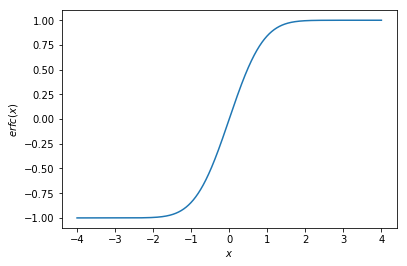

In [431]:
from scipy import special
import matplotlib.pyplot as plt
x = np.linspace(-4,4,10000)
plt.plot(x, special.erf(x))
plt.xlabel('$x$')
plt.ylabel('$erfc(x)$')
plt.show()

In [438]:
#print(np.sort(np.around(special.erfc(x),decimals=2)))

 
values = []
z = special.erfc(x)

def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

z = scale_range(z, 0.97, 1.03)


In [439]:
print(np.around(z,decimals=2))
print(z.shape)

[1.03 1.03 1.03 ... 0.97 0.97 0.97]
(10000,)


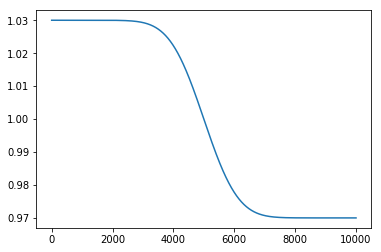

In [440]:
plt.plot(z)